In [1]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import KFold
import keras
import scipy.io as sci
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

Mounted at /content/drive


In [20]:
matData = sci.loadmat('/content/drive/My Drive/proj503_final.mat')

In [26]:
df = pd.DataFrame({'X': matData['sailing_data_3'][0], 'Y': matData['sailing_data_3'][0]})

In [6]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
error = np.array([])
rmse = np.array([])
for t in range(1,55):
  X_train,Y_train = [],[]
  # LOOCV
  train_subjects = [i for i in range(1,55) if i!=t]
  for j in train_subjects:
    X_train = np.append(X_train,df.X[0][j-1].T,axis = 0)
    Y_train = np.append(Y_train,df.Y[1][j-1].T,axis = 0)
  X_test = df.X[0][t-1].T
  Y_test = df.Y[1][t-1].T

  X_train = X_train.reshape(53,3)
  Y_train = Y_train.reshape(53,1)
  X_test = X_test.reshape(1,3)
  Y_test = Y_test.reshape(1,1)
  rf = RandomForestClassifier(n_estimators = 103, max_depth = 3).fit(X_train,Y_train)
  Y_predicted = rf.predict(X_test)
  print('Iteration:',t)
  print( np.mean(Y_test - Y_predicted))
  error = np.append(error,[np.mean(Y_test-Y_predicted)],axis = 0)
  rmse = np.append(rmse,[np.sqrt(np.mean((Y_test-Y_predicted)**2))],axis = 0)


In [13]:
sum(error)

1.0

In [9]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)


In [10]:
for t in range(1,2):
  X_train,Y_train = [],[]
  # LOOCV
  train_subjects = [i for i in range(1,55) if i!=t]
  for j in train_subjects:
    X_train = np.append(X_train,df.X[0][j-1].T,axis = 0)
    Y_train = np.append(Y_train,df.Y[1][j-1].T,axis = 0)
  X_test = df.X[0][t-1].T
  Y_test = df.Y[1][t-1].T

  X_train = X_train.reshape(53,3)
  Y_train = Y_train.reshape(53,1)
  X_test = X_test.reshape(1,3)
  Y_test = Y_test.reshape(1,1)

  # Fit the random search object to the data
  rand_search.fit(X_train, Y_train)




In [11]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'n_estimators': 103}


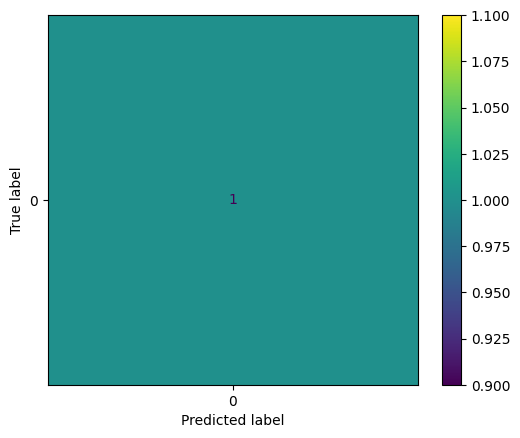

In [15]:
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
dot_data = StringIO()
export_graphviz(rf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = ['fall','spring','nationals'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('all_american.png')
Image(graph.create_png())


Image(graph.create_png())



In [7]:
import statistics

In [44]:
#Tuning Hyperparameters
parameters = df.X[0]
target = df.Y[1]
x_train, x_test, y_train, y_test = train_test_split(parameters, target, test_size=0.2)
mean_vector = []
variance_vec = []


In [ ]:
for i in range(1,4):
  mean_vector = np.append(mean_vector,[statistics.mean(x_train[:,i-1])],axis = 0)
  variance_vec = np.append(variance_vec,[statistics.variance(x_train[:,i-1])],axis = 0)
  x_train[:,i-1] = (x_train[:,i-1]-(mean_vector[i-1]))/variance_vec[i-1]
  x_test[:,i-1]  =  (x_test[:,i-1]-(mean_vector[i-1]))/variance_vec[i-1]


In [45]:


rf = RandomForestClassifier(random_state=0, max_depth = 3,n_estimators = 103)
rf.fit(x_train,y_train)
features = ['fall_position','spring_position',
            'nationals_position']

f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()



In [46]:
predicted=rf.predict(x_test)


In [47]:
confusion_matrix(predicted,y_test)

array([[52,  1],
       [ 0,  0]])